# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Ciência de Dados no Agronegócio</font>
![](https://lh4.googleusercontent.com/FEEVGz1HWczD9NVToUchpPYErGHi9qK2OsGMD8mrCPxZV12wktL5fx1EDhfyIhT6CCHFkFpMJzjgYgUGJiio7u6FcR6k_xD2u3fOaW57cnFIq9j-wyhc_mtxgTv9ZF6VgKs2kBNW)


# Você sabia que aproximadamente **21% do PIB do Brasil** vem do Agronegócio?

![](https://media.giphy.com/media/xUOxfoRK1bYnn145tm/giphy.gif)

![](https://cienciadosdados.com/images/2021/ibge.png)

![](https://cienciadosdados.com/images/2021/pib_agro.png)

![](https://cienciadosdados.com/images/2021/prd_agro.png)

![](https://www.cnabrasil.org.br/assets/images/grafico3panorama_200610_191921.JPG)

# Onde a Ciência de Dados pode atuar no Agronegócio?

Recentemente, observamos o conceito emergente de **agricultura inteligente** que torna a **agricultura mais eficiente e eficaz com a ajuda de algoritmos de alta precisão.**

O Aprendizado de Máquina ajuda a quantificar e compreender processos intensivos de dados em ambientes operacionais agrícolas.

O aprendizado de máquina está em todo o ciclo de cultivo e colheita. 

Começa com o plantio de uma semente no solo - desde o preparo do solo, procriação de sementes e medição da alimentação de água - e termina quando as redes neurais fazem a colheita determinando a maturação com a ajuda da visão computacional.

##Casos Frequentes de uso de Ciência de Dados no Agro

- Previsão de Demanda dos Produtos e de Insumos para produção
- Otimização da Cadeia de Suprimentos
- Detecção e Prevenção de Pragas
- Otimização da lavoura
- Inspeção Visual
- Máquinas Autônomas
- Gerenciamento de Água
- Previsão da Qualidade da Colheita
- Detecção de Ervas Daninhas

![](https://www.hidrobeja.pt/video/tr.png)

# Um caso especial que **a Ciência de Dados** pode ajudar para o sucesso da colheita é o gerenciamento dos Pesticidas Tóxicos


O trabalho de um fazendeiro é um verdadeiro teste de resistência e determinação. 

Depois de plantadas as sementes, ele trabalha dias e noites para se certificar de que terá uma boa colheita no final da temporada. 

![](https://thumbs.gfycat.com/DismalShowyAgama-size_restricted.gif)

Uma boa colheita é garantida por **vários fatores**, como disponibilidade de água, fertilidade do solo, proteção das colheitas contra roedores, **uso oportuno de pesticidas** e outros produtos químicos úteis.


---






Embora muitos desses fatores sejam difíceis de controlar, a **quantidade e a frequência dos pesticidas são algo que o agricultor pode controlar.**



![](https://i.pinimg.com/originals/52/97/ba/5297badc1515dcb0004b6c6d78e8b3ae.gif) 


Os agrotóxicos também são especiais, pois protegem a lavoura com a dosagem certa. 

Mas, se você adicionar mais do que o necessário, eles podem estragar toda a colheita. 

![](https://i1.wp.com/www.cienciaedados.com/wp-content/uploads/2019/07/Aplicac%CC%A7o%CC%83es-e-Te%CC%81cnicas-de-Machine-Learning-na-Agricultura.jpg?resize=900%2C433&ssl=1)

Um alto nível de pesticida pode considerar a safra morta / inadequada para consumo entre muitos resultados. 


#1° Problema de Negócio

Precisamos **prever o resultado da temporada de colheita**, ou seja, se a cultura seria:

 **1. Saudável (viva)**

 **2. Danificada por pesticidas** ou 
 
 **3. Danificada por outros motivos.**

Os dados são baseados em safras colhidas por vários agricultores no final da temporada de colheita. 

# 2° Análise Exploratória dos Dados

![](https://cienciadosdados.com/images/2021/ad.png)

1. **ID - UniqueID**
2.**Estimated_Insects_Count** - Contagem estimada de insetos por metro quadrado
3. **Crop_Type** - Categoria de cultivo (0,1)
4. **Tipo_do solo** - Categoria do solo (0,1)
5. **Pesticide_Use_Category** - Tipo de uso de pesticidas (1- 6. Nunca, 2-Usado anteriormente, 3-Usando atualmente)
7. **Number_Doses_Week** - Número de doses por semana
8. **Number_Weeks_Used** - Número de semanas usadas
9. **Number_Weeks_Quit** - Número de semanas de desistência
10. **Temporada** - Categoria Temporada (1,2,3)
11. **Crop_Damage** - Categoria de dano de cultivo (0 = vivo, 1 = dano devido a outras causas, 2 = dano devido a pesticidas)

![](https://i.pinimg.com/originals/c9/91/72/c99172c17b83d3c620b997858351b2a5.gif)

In [26]:
# Importação de Pacotes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Conexão com os Dados
train_d = pd.read_csv('treino.csv')

In [28]:
# Visualiza as 10 primeiras linhas
train_d.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [29]:
# Informações dos atributos do Dataset
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


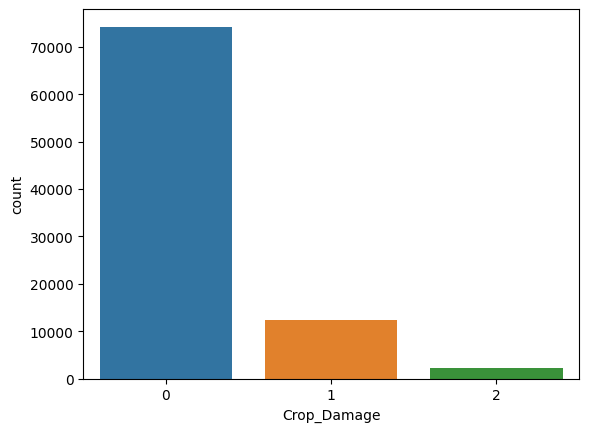

In [30]:
# Explorando a Variável resposta
train_d['Crop_Damage'].value_counts()
ax = sns.countplot(x=train_d['Crop_Damage'])

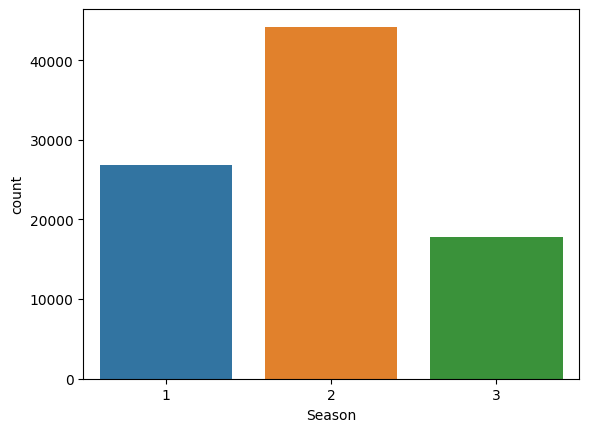

In [31]:
# Explorando a Variável
train_d['Season'].value_counts()
ax = sns.countplot(x=train_d['Season'])

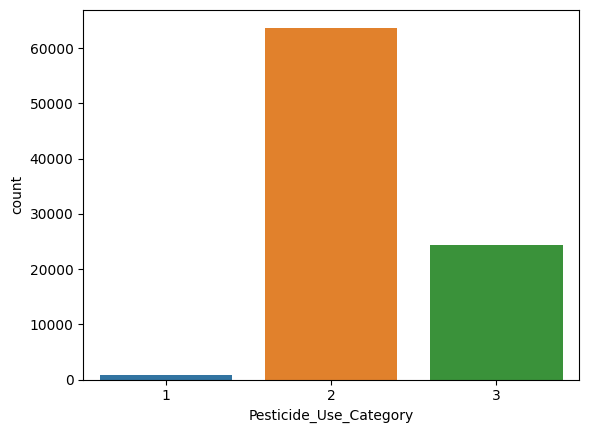

In [32]:
# Explorando a Variável
train_d['Pesticide_Use_Category'].value_counts()
ax = sns.countplot(x=train_d['Pesticide_Use_Category'])

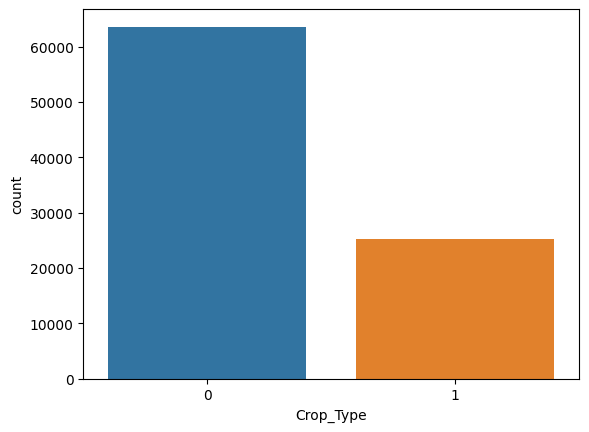

In [33]:
# Explorando a Variável
train_d['Crop_Type'].value_counts()
ax = sns.countplot(x=train_d['Crop_Type'])

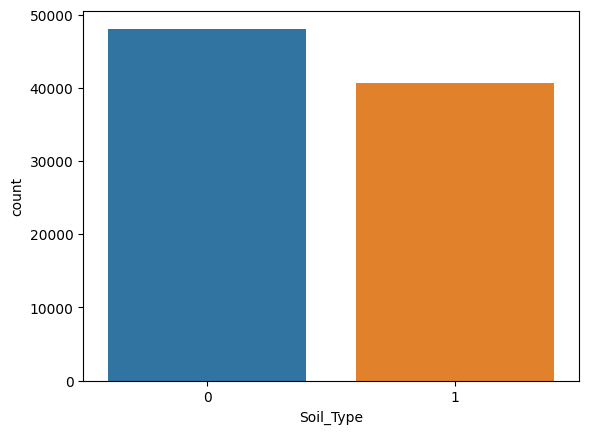

In [34]:
# Explorando a Variável
train_d['Soil_Type'].value_counts()
ax = sns.countplot(x=train_d['Soil_Type'])

In [35]:
# Verificando valores nulos
train_d.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [36]:
# Verifica valores duplicados
train_d.duplicated().sum()

0

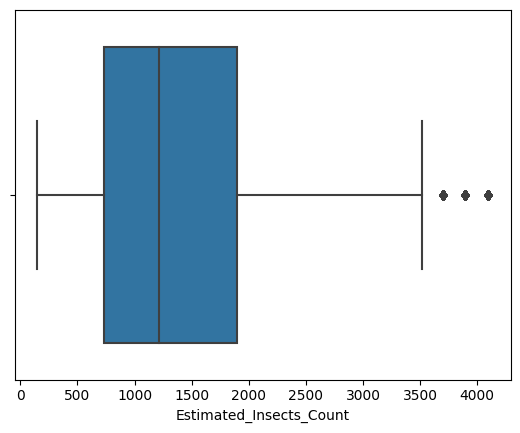

In [37]:
# Estatística descritiva
train_d['Estimated_Insects_Count'].describe()
ax = sns.boxplot(x=train_d['Estimated_Insects_Count'])

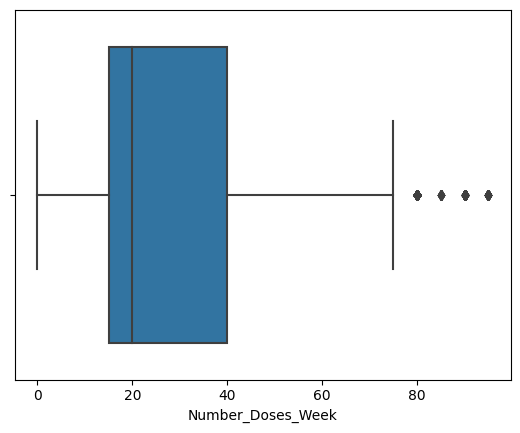

In [38]:
# Estatística descritiva
train_d['Number_Doses_Week'].describe()
ax = sns.boxplot(x=train_d['Number_Doses_Week'])

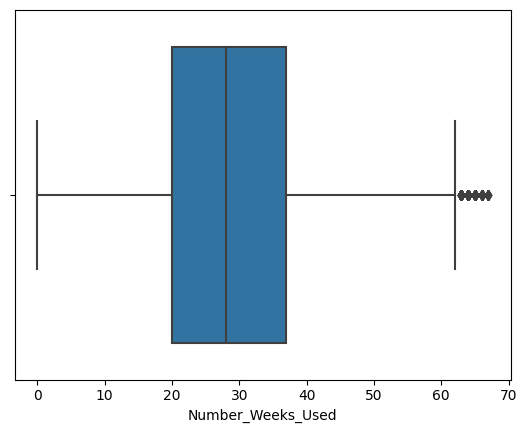

In [39]:
# Estatística descritiva
train_d['Number_Weeks_Used'].describe()
ax = sns.boxplot(x=train_d['Number_Weeks_Used'])

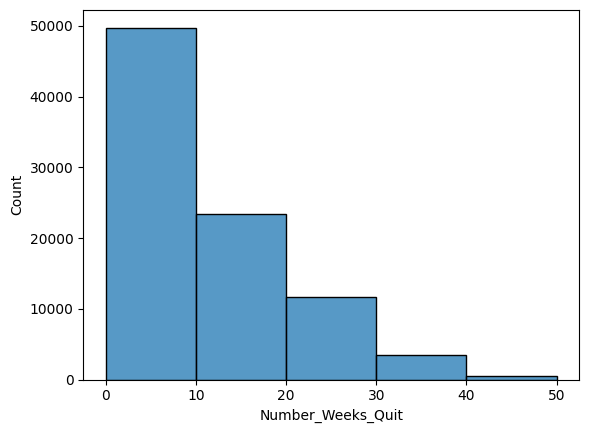

In [40]:
# Estatística descritiva
train_d['Number_Weeks_Quit'].describe()
ax = sns.histplot(x=train_d['Number_Weeks_Quit'], bins=5)

3° Pré-Processamento dos Dados

In [41]:
# Excluir a Variável ID pois ela não é explicativa
train_d.drop('ID', axis=1, inplace=True)
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [42]:
# Exclusão dos Valores ausentes
train_d.dropna(inplace=True)
train_d.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [43]:
train_d.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [44]:
# One-Hot Encoder - Criação de Variáveis Numéricas
for col in ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']:
  train_d = pd.get_dummies(train_d, columns=[col])

In [45]:
train_d.head(2)
train_d.shape

(79858, 15)

In [46]:
# Split dataset
X = train_d.drop(['Crop_Damage'], axis=1)
y = train_d['Crop_Damage'].values.reshape(-1,1)

# Amostragem dos dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

4° Construção das Máquinas Preditivas

In [47]:
# Treinamento da Máquina Preditiva
Maquina_Preditiva = CatBoostClassifier(n_estimators=1000, max_depth=4, random_state=7)
Maquina_Preditiva.fit(X_train, y_train)
predicoes = Maquina_Preditiva.predict_proba(X_test)

Learning rate set to 0.097814
0:	learn: 0.9832092	total: 163ms	remaining: 2m 42s
1:	learn: 0.8949168	total: 184ms	remaining: 1m 31s
2:	learn: 0.8266158	total: 207ms	remaining: 1m 8s
3:	learn: 0.7706912	total: 288ms	remaining: 1m 11s
4:	learn: 0.7241909	total: 345ms	remaining: 1m 8s
5:	learn: 0.6857756	total: 380ms	remaining: 1m 2s
6:	learn: 0.6533072	total: 401ms	remaining: 56.8s
7:	learn: 0.6249385	total: 417ms	remaining: 51.7s
8:	learn: 0.6010892	total: 435ms	remaining: 47.9s
9:	learn: 0.5798398	total: 466ms	remaining: 46.1s
10:	learn: 0.5617840	total: 491ms	remaining: 44.2s
11:	learn: 0.5470850	total: 511ms	remaining: 42.1s
12:	learn: 0.5335494	total: 536ms	remaining: 40.7s
13:	learn: 0.5221289	total: 555ms	remaining: 39.1s
14:	learn: 0.5116100	total: 575ms	remaining: 37.8s
15:	learn: 0.5023982	total: 593ms	remaining: 36.5s
16:	learn: 0.4942070	total: 611ms	remaining: 35.4s
17:	learn: 0.4877251	total: 629ms	remaining: 34.3s
18:	learn: 0.4815039	total: 649ms	remaining: 33.5s
19:	lear

5° Avaliação das Máquinas Preditivas

In [48]:
# Score do modelo nos dados de teste
result = Maquina_Preditiva.score(X_test, y_test)
print("acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

acurácia nos Dados de Teste: 80.103%


In [49]:
# Determinar as Variáveis Mais Importantes
Maquina_Preditiva.feature_importances_

array([21.36537105, 18.29952221, 25.22084161, 11.53187023,  1.84298933,
        1.66553058,  0.92037955,  0.57402227,  0.59774609,  9.50784327,
        6.34740699,  0.78616794,  0.56192349,  0.7783854 ])

In [50]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79858 entries, 0 to 88857
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estimated_Insects_Count   79858 non-null  int64  
 1   Number_Doses_Week         79858 non-null  int64  
 2   Number_Weeks_Used         79858 non-null  float64
 3   Number_Weeks_Quit         79858 non-null  int64  
 4   Crop_Damage               79858 non-null  int64  
 5   Crop_Type_0               79858 non-null  uint8  
 6   Crop_Type_1               79858 non-null  uint8  
 7   Soil_Type_0               79858 non-null  uint8  
 8   Soil_Type_1               79858 non-null  uint8  
 9   Pesticide_Use_Category_1  79858 non-null  uint8  
 10  Pesticide_Use_Category_2  79858 non-null  uint8  
 11  Pesticide_Use_Category_3  79858 non-null  uint8  
 12  Season_1                  79858 non-null  uint8  
 13  Season_2                  79858 non-null  uint8  
 14  Season